# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2022/2023
## Assignment #2 - Empirical Studies & EDA

***
### Group: E
### Names of members: Parvin Abbasi, Aron Jinga, Atharva Phatak

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://www.python.org), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=2637), especially L02 & L03.

**Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.** 

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and every task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, November 8, 2022, 20:00 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, November 16, 2022, 10:00 - 13:00 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A02_Group_A.ipynb
2. RM_A02_Group_A.pdf

***
***

In [1]:
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'Datasets/CRU_data.csv')
sbs.set_theme()
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

#### Task 1 **[10 points] Data Scales**

1. For each of the features in the CRU dataset (e.g., precipitation), identify all scales of data whose definition is valid for all entries in the columns that belong to that feature. Create a table using python code that contains all features as rows, data scales as columns, and binary table entries indicating whether the feature values (i.e., column entries in the database) correspond to the data scale or not.
2. For each of the features, briefly explain to which of the errors mentioned in the lecture this feature is prone. 

In [3]:
#Solution 1
#task1.1:
df_scale = pd.DataFrame({'Feature':  ['Country', 'Year', 'Tempreture', 'Wet days', 'Precipitation' ],
        'Categorical': ['1', '0', '0', '0', '0'],
        'Interval': ['0', '1', '1', '0', '0'],
        'Ratio': ['0', '0', '0', '1', '1'],
        'Ordinal': ['0', '0', '0', '0', '0']})
df_scale = df_scale.set_index('Feature')
df_scale

,Categorical,Interval,Ratio,Ordinal
Feature,,,,
Country,1,0,0,0
Year,0,1,0,0
Tempreture,0,1,0,0
Wet days,0,0,1,0
Precipitation,0,0,1,0


### 1.2 :
- Measurement error can happen for temperature and wet days and precipitation because broken equipment can record wrong values. 
- Sampling error can happen for temperature and wet days and precipitation because gathering data from different cities will obtain different results. 
    - For example, in 2020, only Berlin and Hamburg and Stuttgart are recorded but in 1996, other three cities. 
- For country and year no error is prone.

#### Task 2 **[10 points] Types of Experiments**

Different types of studies and experiments were discussed in the lecture. With respect to climate data, state whether it is possible to conduct the following experiments given below. Briefly explain your reasoning and give an example for each of the four types.

1. Exploratory study
2. Assessment study
3. Observation experiments
4. Manipulation experiments


1. **Exploratory study**: 
    By looking at data we can see that the temperature  is increasing in the long term and the weather pattern is visible. 
    Also some countries are colder than the others depending on their location. 
    Countries that are located around the equator experience hot weather throughout the year. 
    It is because the sun remains almost directly overhead everyday.
    Countries that are further North or South of the equator experience a change in seasons, when hot weather follows cold weather.

2. **Assessment study**: In assessment study we can test data's limit. The minimum recorded value for temperature is -89.2°C (-128.6°F) but in the dataset we can see -999 which is wrong. 

3. **Observation experiments**: We look at the data in the past, and try to find a pattern and test if it is still applicable in the more recent data. As we yield the hypothesis the world is getting warmer, as we saw in the data for specific countries like Belarus.

4. **Manipulation experiments**: We cannot change the temperature and precipitation and so on to manipulate data 


#### Task 3 **[40 points] Visualization**

Plot the four statistics given below using suitable python packages:

1. Timeline of cumulative precipitation over the course of the year 2020. _(i)_ world-wide and _(ii)_ per country.
2. Average precipitation per wetday per country in 2020.
3. Climate diagram based on the average data from the last decade (2011 - 2020) for one country of your choice.<br> _Note: Include the amount of precipitation as well as min, mean, and max temperature._
4. Frequency distribution of mean temperatures in Germany in the timespans (i) 1960-1980 and (ii) 2000-2020. <br> _Note: Use appropriate, common bins for both diagrams._

As a reminder, the following instructions will apply to **all visualization tasks** as part of the RM course: Make sure to use appropriate plot types for visualization (e.g., histogram, bar plot, scatter plot, line plot, ...) and proper axis labeling/scaling. Add a legend to each plot to facilitate the viewer's understanding. Make sure to describe/interpret the outcome of your visualization.

_Hint: It might be helpful to use the [wide__to__long](https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html) function in pandas to format the data for plotting!_ <br>

In [4]:
###########################################
#Solution 1 start
df_indexed = df[df['YEAR'] == 2020].set_index("COUNTRY")
df_a = df_indexed.iloc[:,65:77]
df_b = np.cumsum(df_a.T)

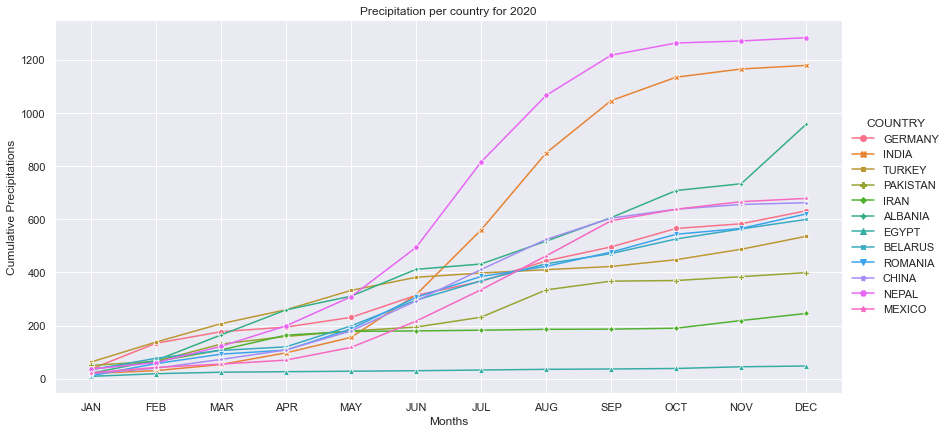

In [5]:
#Plotting of the graph for task 1
g = sbs.relplot(data=df_b, kind='line', height = 6, aspect = 2, markers = True, dashes = False )
g.set_xticklabels(months) #setting the x ticks to make them easier to read
g.set_xlabels("Months")
g.set_ylabels("Cumulative Precipitations")
g.set(title = "Precipitation per country for 2020")

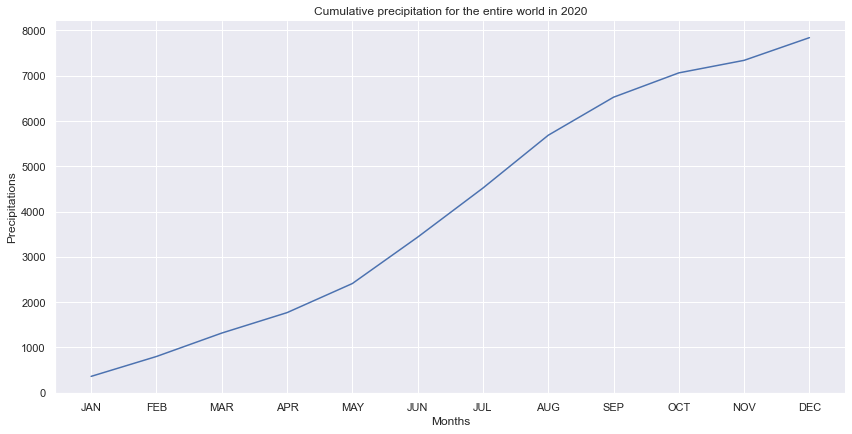

In [6]:
ctr_precip = sbs.relplot(data = np.cumsum(df_a.sum()),kind='line', height = 6, aspect = 2, markers = True, dashes = False )
ctr_precip.set_xticklabels(months) #setting the x ticks to make them easier to read
ctr_precip.set_xlabels("Months")
ctr_precip.set_ylabels("Precipitations")
ctr_precip.set(title = "Cumulative precipitation for the entire world in 2020")

### 3.2

In [7]:
#### Task 2 ####
df_indexed = df[df['YEAR'] == 2020].set_index("COUNTRY")
df_precip = df_indexed.iloc[:,65:77]
df_wet = df_indexed.iloc[:,49:61]
df_wet["Total Precipitation"] = df_precip.sum(axis=1)
#For data visualization, uncomment :)
#df_wet 

# We will get the average for each month by dividing the total amount of precipitation to the wet days for each month.
for i in df_wet.columns:
    df_wet[i] = df_wet['Total Precipitation']/df_wet[i] 
df_wet 

,WET_DAYS_JAN,WET_DAYS_FEB,WET_DAYS_MAR,WET_DAYS_APR,WET_DAYS_MAY,WET_DAYS_JUN,WET_DAYS_JUL,WET_DAYS_AUG,WET_DAYS_SEP,WET_DAYS_OCT,WET_DAYS_NOV,WET_DAYS_DEC,Total Precipitation
COUNTRY,,,,,,,,,,,,,
GERMANY,48.976744,28.459459,43.875000,128.938776,63.180000,42.979592,49.359375,46.800000,57.963303,29.801887,85.378378,40.242038,1.0
INDIA,693.588235,1179.100000,535.954545,357.303030,294.775000,137.104651,102.530435,95.088710,142.060241,294.775000,561.476190,982.583333,1.0
TURKEY,55.257732,39.703704,40.606061,46.608696,44.297521,64.578313,153.142857,99.259259,206.153846,99.259259,83.750000,58.260870,1.0
PAKISTAN,95.095238,234.941176,57.057143,62.406250,66.566667,81.510204,72.618182,62.406250,114.114286,998.500000,159.760000,181.545455,1.0
IRAN,34.605634,37.227273,27.000000,25.593750,54.600000,491.400000,351.000000,351.000000,819.000000,189.000000,42.362069,40.950000,1.0
ALBANIA,184.153846,111.348837,73.099237,72.545455,89.495327,96.727273,199.500000,111.348837,92.970874,105.230769,156.983607,57.000000,1.0
EGYPT,34.214286,20.826087,47.900000,119.750000,95.800000,239.500000,479.000000,479.000000,inf,95.800000,43.545455,59.875000,1.0
BELARUS,42.517730,34.257143,52.130435,119.900000,39.966667,39.701987,43.442029,52.130435,69.709302,45.416667,38.677419,44.738806,1.0
ROMANIA,117.018868,50.422764,62.020000,151.268293,37.587879,36.269006,53.008547,110.750000,88.600000,53.008547,88.600000,46.283582,1.0


We can observe in the table for the wet_days in september, Egypt has an infinity point, having no wet days in the month of September. As such, the plot will not have any data for Egypt in September and it will connect the August and October directly

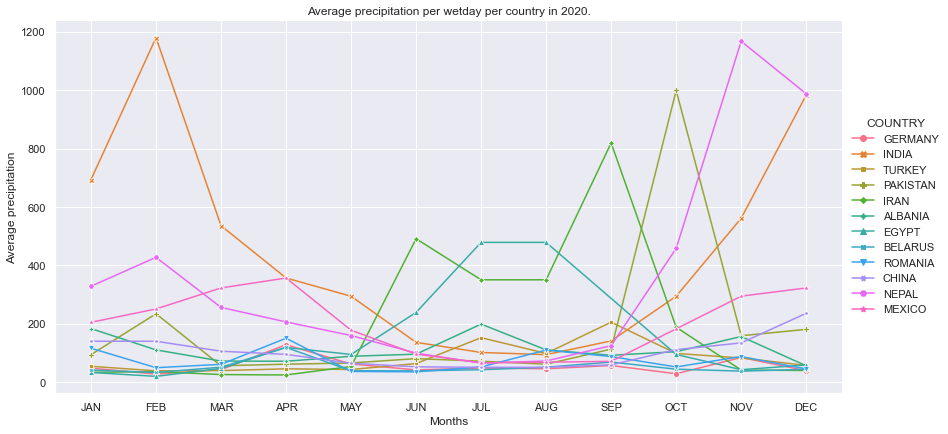

In [8]:
wet_day = sbs.relplot(data = df_wet.drop("Total Precipitation",axis=1).T, kind = 'line', height = 6, aspect = 2, markers = True, dashes = False)
wet_day.set_xticklabels(months)
wet_day.set_xlabels("Months")
wet_day.set_ylabels("Average precipitation")
wet_day.set(title = "Average precipitation per wetday per country in 2020.")
#Solution 2 end

### 3.3

In [9]:
### Task 3 ###
db = df[(df['COUNTRY'] == 'INDIA') & (df['YEAR'].between(2011,2020))].set_index("COUNTRY")
# Created dataset for india between 2011 and 2020
# We will plot the climate graphs based on the average for each month throught the decade.

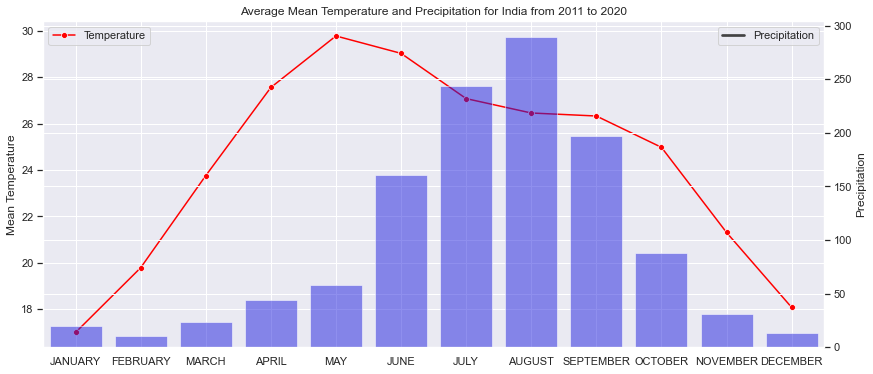

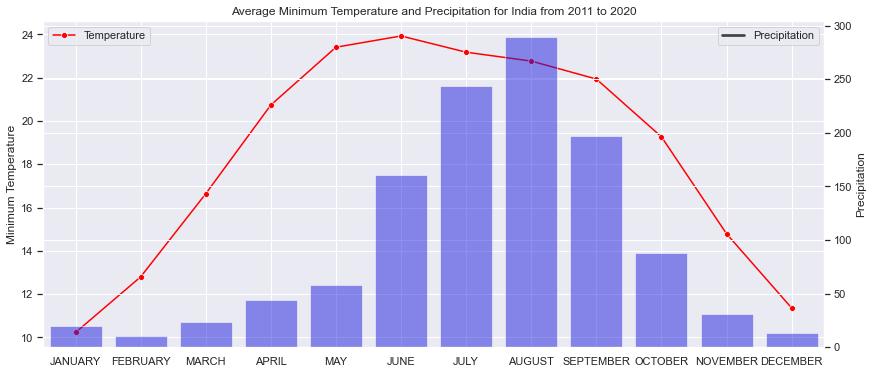

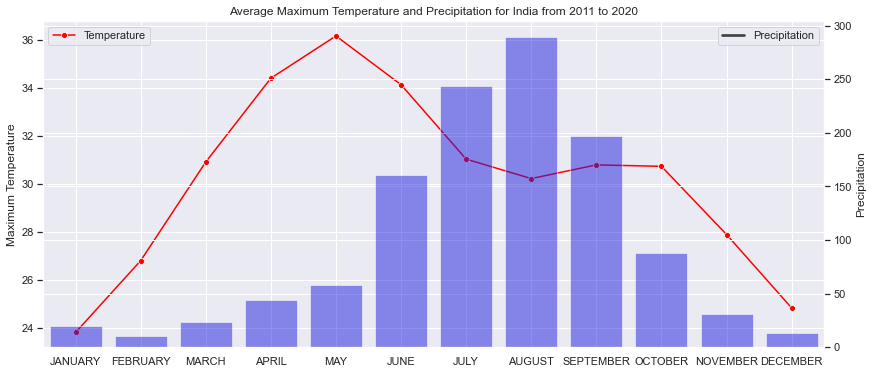

In [10]:
#Climate graphs
df_india = df[df['COUNTRY'] == 'INDIA'].query("YEAR >2010").set_index("YEAR").drop("COUNTRY",axis=1)
df_india_mean_temp = df_india.iloc[:,:12]
df_india_precip_pc = df_precip.iloc[1:2].rename(columns = {'PRECIP_JAN':'JANUARY', 'PRECIP_FEB':'FEBRUARY', 'PRECIP_MAR' : 'MARCH',
                                                           'PRECIP_APR':'APRIL','PRECIP_MAY':'MAY','PRECIP_JUN':'JUNE','PRECIP_JUL':'JULY',
                                                           'PRECIP_AUG':'AUGUST','PRECIP_SEP':'SEPTEMBER','PRECIP_OCT':'OCTOBER','PRECIP_NOV':'NOVEMBER',
                                                           'PRECIP_DEC':'DECEMBER'})

fig, ax1 = plt.subplots(figsize=(14,6))
sbs.lineplot(data=df_india_mean_temp.sum(axis=0)/10,color='red',marker = 'o',sort=False,ax=ax1)
ax1.set(ylabel="Mean Temperature", title = "Average Mean Temperature and Precipitation for India from 2011 to 2020")
ax1.legend(['Temperature'], loc="upper left")
ax2 = ax1.twinx()
ax2.set(ylabel = "Precipitation")
sbs.barplot(data=df_india_precip_pc,ax=ax2,alpha=0.5,color='blue')
ax2.legend(['Precipitation'], loc = "upper right")


df_india_min_temp = df_india.iloc[:,16:28]
fig, ax1 = plt.subplots(figsize=(14,6))
sbs.lineplot(data=df_india_min_temp.sum(axis=0)/10,color='red',marker = 'o',sort=False,ax=ax1)
ax1.set(ylabel="Minimum Temperature", title = "Average Minimum Temperature and Precipitation for India from 2011 to 2020")
ax1.legend(['Temperature'], loc="upper left")
ax2 = ax1.twinx()
ax2.set(ylabel = "Precipitation")
sbs.barplot(data=df_india_precip_pc,ax=ax2,alpha=0.5,color='blue')
ax2.legend(['Precipitation'], loc = "upper right")


df_india_max_temp = df_india.iloc[:,32:44]
fig, ax1 = plt.subplots(figsize=(14,6))
sbs.lineplot(data=df_india_max_temp.sum(axis=0)/10,color='red',marker = 'o',sort=False,ax=ax1)
ax1.set(ylabel="Maximum Temperature", title = "Average Maximum Temperature and Precipitation for India from 2011 to 2020")
ax1.legend(['Temperature'], loc="upper left")
ax2 = ax1.twinx()
ax2.set(ylabel = "Precipitation")
sbs.barplot(data=df_india_precip_pc,ax=ax2,alpha=0.5,color='blue')
ax2.legend(['Precipitation'], loc = "upper right")

### 3.4

[Text(0.5, 0, 'Temperature')]

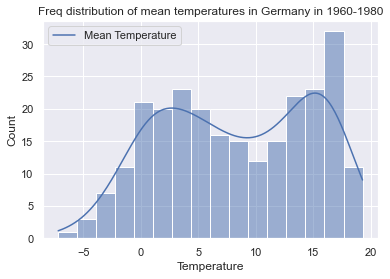

In [11]:
#3.4
#Nr of bins = square root of total nr of data points (252 in our case)
#The binsize = (max_value-min_value)/(number of bins)
df_germany_data1 = df[df["COUNTRY"] == "GERMANY"].query("1959 < YEAR < 1981")
df_germany_data2 = df[df["COUNTRY"] == "GERMANY"].query("1999 < YEAR < 2022")
df_germany_tp1 = df_germany_data1.iloc[:,:14].drop(["COUNTRY","YEAR"],axis=1)
df_germany_tp2 = df_germany_data2.iloc[:,:14].drop(["COUNTRY","YEAR"],axis=1)
fig1 = sbs.histplot(data = df_germany_tp1.melt(),bins=16,binwidth=(19.3-(-7.2))/16, kde = True)
fig1.set(title = "Freq distribution of mean temperatures in Germany in 1960-1980")
fig1.legend(['Mean Temperature'], loc = "upper left")
fig1.set(xlabel = "Temperature")

[Text(0.5, 0, 'Temperature')]

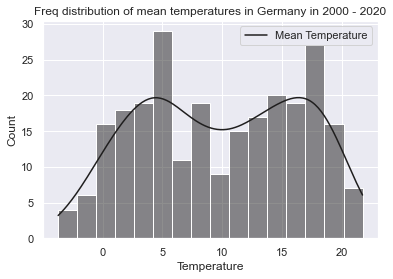

In [12]:
fig2 = sbs.histplot(data = df_germany_tp2.melt(),bins=16,binwidth=(21.7-(-3.7))/16, kde = True, palette = "icefire")
fig2.set(title = "Freq distribution of mean temperatures in Germany in 2000 - 2020")
fig2.legend(['Mean Temperature'], loc = "upper right")
fig2.set(xlabel = "Temperature")

#### Task 4 **[40 points] EDA**

Following the Titanic example from the lecture, we want to gain first insights into multivariate EDA. We want to see if the climate warming is different between countries. For this purpose, take the following steps using python to answer the question **whether the number of warmer/colder months (compared to 50 years ago) changes between countries and whether there is a difference between decades.**

For this task use the data from Egypt and Belarus starting from the year 1961.

1. For each month, calculate if it was warmer or colder compared to the same month 50 years ago.
2. Create two contingency tables of **total number of warmer and colder months per country** (one containing the absolute counts and the second one containing row and column proportions).
3. Create another two contingency tables of **total number of warmer and colder months per decade** (one containing the absolute counts and the second one containing row and column proportions).
4. Plot a histogram or bar chart that shows the **total number of warmer months by country and decade**. _Hint: The usage of different colors might help a lot!_
5. Now combine the contingency tables of task 4.2 and 4.3 (see Titanic example discussed in the EDA lecture), so that you have a subdivision into countries by decade, with absolute counts and row/column proportions.
6. Calculate the expected frequencies $f_e$ for each conjunct event in the contingency table from task 4.5 and create a copy of the table from task 4.5 containing the $f_e$ values.
7. Calculate $\chi²_{Egypt}$ and $\chi²_{Belarus}$ and interpret.
8. What does a small $\chi²$ value mean? What if it's zero? Explain.

### Create the Proper dataset to answer the question 4.1

In [13]:
decades1 = ["1961-1970" for i in range(0,120)]
decades2 = ["1971-1980" for i in range(0,120)]
decades3 = ["1981-1990" for i in range(0,120)]
decades4 = ["1991-2000" for i in range(0,120)]
decades5 = ["2001-2010" for i in range(0,120)]
decades6 = ["2011-2020" for i in range(0,120)]

decades = decades1 + decades2 + decades3 + decades4 + decades5 + decades6

final_decades = (decades + decades)

In [14]:
df_egypt = df[df["COUNTRY"] == 'EGYPT'].iloc[:,:14].reset_index().drop("index",axis=1)

In [15]:
import calendar
m=calendar.month_name[1:]
year = []
months = m*60
result = []
country = ["EGYPT" for i in range(0,720)]
for i in range(60,120):
    for j in df_egypt.columns[2:]:
        #print(i,j)
        year.append(1901+i)
        if(df_egypt.loc[i,j] > df_egypt.loc[i-50,j]):
            result.append("Warmer")
        elif(df_egypt.loc[i,j] < df_egypt.loc[i-50,j]):
            result.append("Colder")
        elif((df_egypt.loc[i,j] == df_egypt.loc[i-50,j])):
            result.append("No Change")
data = {"COUNTRY":country,"YEAR":year,"DECADE":decades, "MONTH":months,"RESULT":result}
df_egypt_warmer = pd.DataFrame(data)
df_41_egypt = df_egypt_warmer

In [16]:
df_belarus = df[df["COUNTRY"] == 'BELARUS'].iloc[:,:14].reset_index().drop("index",axis=1)

In [17]:
import calendar
m=calendar.month_name[1:]
year = []
months = m*60
result = []
country = ["BELARUS" for i in range(0,720)]
for i in range(60,120):
    for j in df_belarus.columns[2:]:
        #print(i,j)
        year.append(1901+i)
        if(df_belarus.loc[i,j] > df_belarus.loc[i-50,j]):
            result.append("Warmer")
        elif(df_belarus.loc[i,j] < df_belarus.loc[i-50,j]):
            result.append("Colder")
        elif(df_belarus.loc[i,j] == df_belarus.loc[i-50,j]):
            result.append("No Change")
data = {"COUNTRY":country,"YEAR":year,"DECADE":decades, "MONTH":months,"RESULT":result}
df_belarus_warmer = pd.DataFrame(data)
df_41_belarus = df_belarus_warmer

### 4.1

In [18]:
df_41_egypt #df_41_egypt is the dataset that shows if every month starting from 1961 was warmer, colder, or had no change.
            #The Year 1961 implies that January of 1961 was warmer than Jaunary of 1911

,COUNTRY,YEAR,DECADE,MONTH,RESULT
0,EGYPT,1961,1961-1970,January,Warmer
1,EGYPT,1961,1961-1970,February,Warmer
2,EGYPT,1961,1961-1970,March,Colder
3,EGYPT,1961,1961-1970,April,Warmer
4,EGYPT,1961,1961-1970,May,Warmer
...,...,...,...,...,...
715,EGYPT,2020,2011-2020,August,Warmer
716,EGYPT,2020,2011-2020,September,Warmer
717,EGYPT,2020,2011-2020,October,Warmer
718,EGYPT,2020,2011-2020,November,Warmer


In [19]:
df_41_belarus #df_41_belarus is the dataset that shows if every month starting from 1961 was warmer, colder, or had no change.
              #The Year 1961 implies that January of 1961 was warmer than Jaunary of 1911

,COUNTRY,YEAR,DECADE,MONTH,RESULT
0,BELARUS,1961,1961-1970,January,Warmer
1,BELARUS,1961,1961-1970,February,Warmer
2,BELARUS,1961,1961-1970,March,Warmer
3,BELARUS,1961,1961-1970,April,Warmer
4,BELARUS,1961,1961-1970,May,Colder
...,...,...,...,...,...
715,BELARUS,2020,2011-2020,August,Warmer
716,BELARUS,2020,2011-2020,September,Warmer
717,BELARUS,2020,2011-2020,October,Warmer
718,BELARUS,2020,2011-2020,November,Warmer


### Preprocess the Data to remove the Months that did not have any change

In [20]:
df_egypt_warmer.query("RESULT=='No Change'")

,COUNTRY,YEAR,DECADE,MONTH,RESULT
6,EGYPT,1961,1961-1970,July,No Change
90,EGYPT,1968,1961-1970,July,No Change
116,EGYPT,1970,1961-1970,September,No Change
118,EGYPT,1970,1961-1970,November,No Change
125,EGYPT,1971,1971-1980,June,No Change
136,EGYPT,1972,1971-1980,May,No Change
187,EGYPT,1976,1971-1980,August,No Change
190,EGYPT,1976,1971-1980,November,No Change
195,EGYPT,1977,1971-1980,April,No Change
331,EGYPT,1988,1981-1990,August,No Change


In [21]:
df_egypt_warmer.drop([6,90,116,118,125,136,187,190,195,331,354,368,420,439,440,441,551,561,653],inplace=True)

In [22]:
df_belarus_warmer.query("RESULT=='No Change'")

,COUNTRY,YEAR,DECADE,MONTH,RESULT
101,BELARUS,1969,1961-1970,June,No Change
171,BELARUS,1975,1971-1980,April,No Change
213,BELARUS,1978,1971-1980,October,No Change
214,BELARUS,1978,1971-1980,November,No Change
220,BELARUS,1979,1971-1980,May,No Change
313,BELARUS,1987,1981-1990,February,No Change
472,BELARUS,2000,1991-2000,May,No Change
621,BELARUS,2012,2011-2020,October,No Change
660,BELARUS,2016,2011-2020,January,No Change


In [23]:
df_belarus_warmer.drop([101,171,213,214,220,313,472,621,660],inplace=True)

In [24]:
final_data = pd.concat([df_egypt_warmer,df_belarus_warmer])
final_data   #Concatenate the data to create the final data set

,COUNTRY,YEAR,DECADE,MONTH,RESULT
0,EGYPT,1961,1961-1970,January,Warmer
1,EGYPT,1961,1961-1970,February,Warmer
2,EGYPT,1961,1961-1970,March,Colder
3,EGYPT,1961,1961-1970,April,Warmer
4,EGYPT,1961,1961-1970,May,Warmer
...,...,...,...,...,...
715,BELARUS,2020,2011-2020,August,Warmer
716,BELARUS,2020,2011-2020,September,Warmer
717,BELARUS,2020,2011-2020,October,Warmer
718,BELARUS,2020,2011-2020,November,Warmer


### End of Data Preprocessing

### 4.2

In [25]:
#4.2
#Contingency Tables per country
pd.crosstab(final_data.COUNTRY,final_data.RESULT,margins=True) #Table with absolute count

RESULT,Colder,Warmer,All
COUNTRY,,,
BELARUS,294,417,711
EGYPT,291,410,701
All,585,827,1412


In [26]:
pd.crosstab(final_data.COUNTRY,final_data.RESULT,margins=True, normalize = 'index') #Table with row normalization

RESULT,Colder,Warmer
COUNTRY,,
BELARUS,0.413502,0.586498
EGYPT,0.415121,0.584879
All,0.414306,0.585694


In [27]:
pd.crosstab(final_data.COUNTRY,final_data.RESULT,margins=True, normalize = 'columns') #Table with Column Normalization

RESULT,Colder,Warmer,All
COUNTRY,,,
BELARUS,0.502564,0.504232,0.503541
EGYPT,0.497436,0.495768,0.496459


In [28]:
pd.crosstab(final_data.COUNTRY,final_data.RESULT,margins=True, normalize = 'all') #Table with 'All' Normalization

RESULT,Colder,Warmer,All
COUNTRY,,,
BELARUS,0.208215,0.295326,0.503541
EGYPT,0.206091,0.290368,0.496459
All,0.414306,0.585694,1.000000


### 4.3

In [29]:
#4.3
#Contingency Tables per decade
pd.crosstab(final_data.DECADE,final_data.RESULT,margins=True) #Table with absolute count

RESULT,Colder,Warmer,All
DECADE,,,
1961-1970,121,114,235
1971-1980,127,104,231
1981-1990,144,93,237
1991-2000,90,144,234
2001-2010,57,181,238
2011-2020,46,191,237
All,585,827,1412


In [30]:
pd.crosstab(final_data.DECADE,final_data.RESULT,margins=True,normalize = 'index') #Table with row normalization

RESULT,Colder,Warmer
DECADE,,
1961-1970,0.514894,0.485106
1971-1980,0.549784,0.450216
1981-1990,0.607595,0.392405
1991-2000,0.384615,0.615385
2001-2010,0.239496,0.760504
2011-2020,0.194093,0.805907
All,0.414306,0.585694


In [31]:
pd.crosstab(final_data.DECADE,final_data.RESULT,margins=True, normalize = 'columns') #Table with Column Normalization

RESULT,Colder,Warmer,All
DECADE,,,
1961-1970,0.206838,0.137848,0.166431
1971-1980,0.217094,0.125756,0.163598
1981-1990,0.246154,0.112455,0.167847
1991-2000,0.153846,0.174123,0.165722
2001-2010,0.097436,0.218863,0.168555
2011-2020,0.078632,0.230955,0.167847


In [32]:
pd.crosstab(final_data.DECADE,final_data.RESULT,margins=True, normalize = 'all') #Table with 'All' Normalization

RESULT,Colder,Warmer,All
DECADE,,,
1961-1970,0.085694,0.080737,0.166431
1971-1980,0.089943,0.073654,0.163598
1981-1990,0.101983,0.065864,0.167847
1991-2000,0.063739,0.101983,0.165722
2001-2010,0.040368,0.128187,0.168555
2011-2020,0.032578,0.135269,0.167847
All,0.414306,0.585694,1.000000


### 4.4

[Text(0.5, 1.0, 'Total number of warmer months by country and decade')]

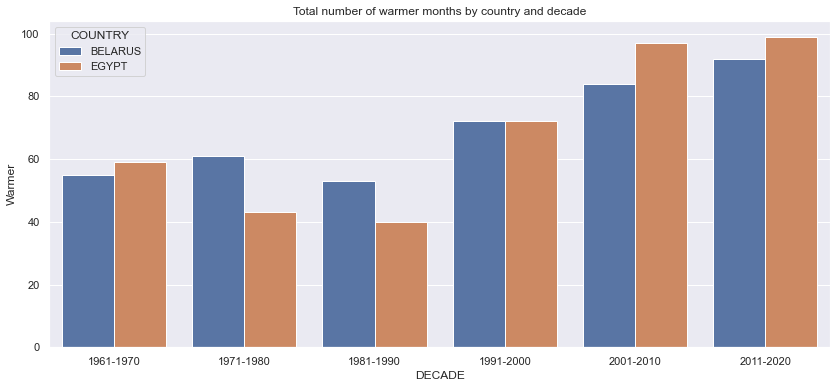

In [33]:
#4.4
cross_data = pd.crosstab([final_data.COUNTRY,final_data.DECADE],final_data.RESULT,margins=True)
cross = cross_data.reset_index().drop(12)
fig, ax1 = plt.subplots(figsize=(14,6))
sbs.barplot(data=cross, x="DECADE", y="Warmer", hue="COUNTRY").set(title="Total number of warmer months by country and decade")

### 4.5

In [34]:
#4.5
# Contingency tables per country and per decade. Combining tables from 4.2 and 4.3
cross_data = pd.crosstab([final_data.COUNTRY,final_data.DECADE],final_data.RESULT,margins=True)
cross_data

RESULT             Colder  Warmer   All
COUNTRY DECADE                         
BELARUS 1961-1970      64      55   119
        1971-1980      55      61   116
        1981-1990      66      53   119
        1991-2000      47      72   119
        2001-2010      36      84   120
        2011-2020      26      92   118
EGYPT   1961-1970      57      59   116
        1971-1980      72      43   115
        1981-1990      78      40   118
        1991-2000      43      72   115
        2001-2010      21      97   118
        2011-2020      20      99   119
All                   585     827  1412

In [35]:
pd.crosstab([final_data.COUNTRY,final_data.DECADE],final_data.RESULT,margins=True, normalize = 'columns') #Normalized per Columns

RESULT               Colder    Warmer       All
COUNTRY DECADE                                 
BELARUS 1961-1970  0.109402  0.066505  0.084278
        1971-1980  0.094017  0.073761  0.082153
        1981-1990  0.112821  0.064087  0.084278
        1991-2000  0.080342  0.087062  0.084278
        2001-2010  0.061538  0.101572  0.084986
        2011-2020  0.044444  0.111245  0.083569
EGYPT   1961-1970  0.097436  0.071342  0.082153
        1971-1980  0.123077  0.051995  0.081445
        1981-1990  0.133333  0.048368  0.083569
        1991-2000  0.073504  0.087062  0.081445
        2001-2010  0.035897  0.117291  0.083569
        2011-2020  0.034188  0.119710  0.084278

### 4.6

In [36]:
#4.6
fe_data = cross_data.copy(deep=True)
fe_data = fe_data.reset_index()
fe_cold_total = 585
fe_warm_total = 827
for j in ["Colder","Warmer"]:
    for i in range(0,12):
        if(j=="Colder"):
            fe_data.loc[i,j] = (fe_data.loc[i,"All"]*fe_cold_total)/1412
        elif(j=="Warmer"):
            fe_data.loc[i,j] = (fe_data.loc[i,"All"]*fe_warm_total)/1412
fe_data.set_index(["COUNTRY", "DECADE"])

RESULT                 Colder      Warmer   All
COUNTRY DECADE                                 
BELARUS 1961-1970   49.302408   69.697592   119
        1971-1980   48.059490   67.940510   116
        1981-1990   49.302408   69.697592   119
        1991-2000   49.302408   69.697592   119
        2001-2010   49.716714   70.283286   120
        2011-2020   48.888102   69.111898   118
EGYPT   1961-1970   48.059490   67.940510   116
        1971-1980   47.645184   67.354816   115
        1981-1990   48.888102   69.111898   118
        1991-2000   47.645184   67.354816   115
        2001-2010   48.888102   69.111898   118
        2011-2020   49.302408   69.697592   119
All                585.000000  827.000000  1412

### fe_data is the table which is filled with the expected frequencies

### 4.7

In [37]:
#4.7
cross_data = cross_data.reset_index()
fe_data = fe_data.reset_index()
chi_squared_belarus = 0
for j in ["Colder","Warmer"]:
    for i in range(0,6):
        chi_squared_belarus += np.square(cross_data.loc[i,j]-fe_data.loc[i,j])/fe_data.loc[i,j]
chi_squared_egypt = 0
for j in ["Colder","Warmer"]:
    for i in range(6,12):
        chi_squared_egypt += np.square(cross_data.loc[i,j]-fe_data.loc[i,j])/fe_data.loc[i,j]
print("Chi Squared for Belarus is ",chi_squared_belarus)
print("Chi Squared for Egypt ypt is ",chi_squared_egypt)

Chi Squared for Belarus is  43.78812406853108
Chi Squared for Egypt ypt is  111.36431334863138


Higher chi values implies higher correlation in the data. As we see in our dataset, the value for Belarus is approx. 43, which shows Belarus is getting warmer over time, but for Egypt the value is approx. 111, which results in a higher change with passing time.

Since the chi values between Belarus and Egypt are different, this shows that the two countries are affected diffently with respect to time.


### 4.8

A zero chi squared value means that the expected frequency and observed frequency are exactly the same. This implies that the conjunct event of temperature and time would be mutually independent of each other. Implying that they have no correlation. For a small value, it means that the values are less dependent.